## Capstone 2: Data Wrangling

After a few preliminary notebooks which looked at the data and did some rudimentary analysis (first will all of the data, then with just 1 pitcher), I decided to use 7 pitchers to subset the data on for 2015. I selected the pitchers listed on mlb.com's list of top 10 starting pitchers in the 2010's, excluding the 3 who missed significant time due to injury in the years we will look at. They are Clayton Kershaw, Max Scherzer, Zack Greinke, Justin Verlander, Chris Sale, Jon Lester, and Jacob DeGrom. 
https://www.mlb.com/news/top-10-starting-pitchers-of-the-2010s

The feature we will be focusing on will be the type of pitch thrown with a target of minimizing the success of the opposing team. For now I decided to focus on starting pitchers as they provide more data and are typically required to have a more diverse pitch repoitoire than relief pitchers who only pitch for an inning or 2. 

The data will be acquired from https://www.kaggle.com/pschale/mlb-pitch-data-20152018?select=pitches.csv
which was scraped from  http://gd2.mlb.com/components/game/mlb/.



## Imports

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas_profiling
from library.sb_utils import save_file
%matplotlib inline

In [2]:
import datetime as dt
from datetime import datetime

### Because I found myself repeatedly using this technique, I decided to define the following function to show missing values. In the future, I may create a .py file with other functions I find to be useful or time saving. 

In [3]:
#missing values function
def missing(df):
    '''Takes dataframe as argument, 
    returns count and % of missing values for each column'''
    import pandas as pd
    miss = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis = 1)
    miss.columns = ['count','%']
    return miss.sort_values(by = ['count'], ascending = False)

### Importing the data (names.csv, games.csv, atbats.csv, pitches.csv)

In [4]:
#the CSV data files are in the data/raw directory
#player names
names = pd.read_csv('../data/raw/player_names.csv')
atbats = pd.read_csv('../data/raw/atbats.csv')
games = pd.read_csv('../data/raw/games.csv')
pitches = pd.read_csv('../data/raw/pitches.csv')

In [5]:
#take a look at each one followed by their column and missing values info

In [6]:
names.head()

,id,first_name,last_name
0,452657,Jon,Lester
1,425794,Adam,Wainwright
2,457435,Phil,Coke
3,435400,Jason,Motte
4,519166,Neil,Ramirez


In [7]:
missing(names)

,count,%
id,0,0.0
first_name,0,0.0
last_name,0,0.0


In [8]:
games.head()

,attendance,away_final_score,away_team,date,elapsed_time,g_id,home_final_score,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
0,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
1,45909,1,ana,2015-04-06,153,201500002,4,sea,1:12 PM,Ron Kulpa,Brian Knight,Vic Carapazza,Larry Vanover,Safeco Field,"54 degrees, cloudy","1 mph, Varies",0
2,36969,2,atl,2015-04-06,156,201500003,1,mia,4:22 PM,Laz Diaz,Chris Guccione,Cory Blaser,Jeff Nelson,Marlins Park,"80 degrees, partly cloudy","16 mph, In from CF",16
3,31042,6,bal,2015-04-06,181,201500004,2,tba,3:12 PM,Ed Hickox,Paul Nauert,Mike Estabrook,Dana DeMuth,Tropicana Field,"72 degrees, dome","0 mph, None",0
4,45549,8,bos,2015-04-06,181,201500005,0,phi,3:08 PM,Phil Cuzzi,Tony Randazzo,Will Little,Gerry Davis,Citizens Bank Park,"71 degrees, partly cloudy","11 mph, Out to RF",0


In [9]:
missing(games)

,count,%
umpire_2B,3,0.030871
attendance,0,0.000000
umpire_1B,0,0.000000
wind,0,0.000000
weather,0,0.000000
venue_name,0,0.000000
umpire_HP,0,0.000000
umpire_3B,0,0.000000
start_time,0,0.000000
away_final_score,0,0.000000


In [10]:
atbats.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True


In [11]:
missing(atbats)

,count,%
ab_id,0,0.0
batter_id,0,0.0
event,0,0.0
g_id,0,0.0
inning,0,0.0
o,0,0.0
p_score,0,0.0
p_throws,0,0.0
pitcher_id,0,0.0
stand,0,0.0


In [12]:
pitches.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [13]:
missing(pitches)

,count,%
px,14189,0.494881
type_confidence,14189,0.494881
pitch_type,14189,0.494881
zone,14189,0.494881
nasty,14189,0.494881
z0,14189,0.494881
y0,14189,0.494881
pz,14189,0.494881
x0,14189,0.494881
vz0,14189,0.494881


### Notes on missing values 
None of the columns in any of the dataframes have more than 0.5% missing values, so we wont worry about them at the moment

For now we are trying to predict the type of pitch thrown next, so we can get rid of data related to movement of an individual pitch, i.e., spin rate, break angle, etc, as these occur after the fact. 

In the future we could maybe look at classifying pitches based on these measures, but that is likely a separate project. 

In [14]:
#find the player ID's of the 7 pitchers
pitchers = [('Clayton', 'Kershaw'), ('Max', 'Scherzer'), ('Zack','Greinke'), \
            ('Justin', 'Verlander'), ('Jon', 'Lester'), ('Chris', 'Sale'), ('Jacob','deGrom')]


In [15]:
for p in pitchers:
    print(p[0])

Clayton
Max
Zack
Justin
Jon
Chris
Jacob


In [16]:
#manually getting the player ids we want
for p in pitchers:
    print(names[(names.first_name == p[0]) & (names.last_name == p[1])])

        id first_name last_name
85  477132    Clayton   Kershaw
        id first_name last_name
69  453286        Max  Scherzer
         id first_name last_name
148  425844       Zack   Greinke
         id first_name  last_name
563  434378     Justin  Verlander
       id first_name last_name
0  452657        Jon    Lester
         id first_name last_name
365  519242      Chris      Sale
         id first_name last_name
220  594798      Jacob    deGrom


In [17]:
pitchersIDs = [477132, 453286, 425844, 434378, 452657, 519242, 594798]
#create dict just in case it's needed
sevenID = {}
for i in range(7):
    sevenID[pitchers[i][1]] = pitchersIDs[i]

In [18]:
sevenID

{'Kershaw': 477132,
 'Scherzer': 453286,
 'Greinke': 425844,
 'Verlander': 434378,
 'Lester': 452657,
 'Sale': 519242,
 'deGrom': 594798}

In [19]:
#subset the data to these 7 pitchers
atbats15 = atbats[atbats.pitcher_id.isin(pitchersIDs)]

In [20]:
#add names
atbats15.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True


## Merge atbats with names and games (to add last name and date cols)

In [21]:
atbats15 = atbats15.merge(names[['id','last_name']], how = 'left', left_on = 'pitcher_id', right_on ='id')

In [22]:
atbats15.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top,id,last_name
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True,452657,Lester
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True,452657,Lester
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True,452657,Lester
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True,452657,Lester
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True,452657,Lester


In [23]:
atbats15 = atbats15.merge(games[['g_id','date']], on = 'g_id', how = 'left')

In [24]:
atbats15.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top,id,last_name,date
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True,452657,Lester,2015-04-05
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True,452657,Lester,2015-04-05
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True,452657,Lester,2015-04-05
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True,452657,Lester,2015-04-05
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True,452657,Lester,2015-04-05


### Here we will use datetime to filter our data to only include events in 2015

In [25]:
#filter the data to 2015
atbats15['date'] = pd.to_datetime(atbats15['date'], infer_datetime_format = True)
atbats15 = atbats15[atbats15.date < datetime.fromisoformat('2016-01-01')]
atbats15.tail()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top,id,last_name,date
5620,2015184073,543685,Strikeout,201502429,3,2,0,R,594798,R,True,594798,deGrom,2015-10-04
5621,2015184074,607208,Pop Out,201502429,3,3,0,R,594798,R,True,594798,deGrom,2015-10-04
5622,2015184079,547180,Groundout,201502429,4,1,0,R,594798,L,True,594798,deGrom,2015-10-04
5623,2015184080,150029,Strikeout,201502429,4,2,0,R,594798,R,True,594798,deGrom,2015-10-04
5624,2015184081,519208,Groundout,201502429,4,3,0,R,594798,L,True,594798,deGrom,2015-10-04


In [26]:
atbats15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 0 to 5624
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ab_id       5625 non-null   int64         
 1   batter_id   5625 non-null   int64         
 2   event       5625 non-null   object        
 3   g_id        5625 non-null   int64         
 4   inning      5625 non-null   int64         
 5   o           5625 non-null   int64         
 6   p_score     5625 non-null   int64         
 7   p_throws    5625 non-null   object        
 8   pitcher_id  5625 non-null   int64         
 9   stand       5625 non-null   object        
 10  top         5625 non-null   bool          
 11  id          5625 non-null   int64         
 12  last_name   5625 non-null   object        
 13  date        5625 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(8), object(4)
memory usage: 620.7+ KB


In [40]:
# save the data to a new csv file before adding pitch data
datapath = '../data/interim'
save_file(atbats15, 'atbats2015.csv', datapath)

Writing file.  "../data/interim\atbats2015.csv"


### Now we will subset the pitch data 
(removing columns pertaining to the movement of the pitch after it's thrown, as mentioned earlier).

In [27]:
pitchSubset = pitches.iloc[:, 27:]

In [28]:
pitchSubset.head()

,code,type,pitch_type,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,C,S,FF,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,S,S,FF,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,F,S,FF,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,B,B,FF,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,B,B,CU,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [29]:
pitchSubset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867154 entries, 0 to 2867153
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   code        object 
 1   type        object 
 2   pitch_type  object 
 3   event_num   int64  
 4   b_score     float64
 5   ab_id       float64
 6   b_count     float64
 7   s_count     float64
 8   outs        float64
 9   pitch_num   float64
 10  on_1b       float64
 11  on_2b       float64
 12  on_3b       float64
dtypes: float64(9), int64(1), object(3)
memory usage: 284.4+ MB


In [32]:
datapath = '../data/interim'
save_file(pitchSubset, 'pitchSubset2015.csv', datapath)

Writing file.  "../data/interim\pitchSubset2015.csv"


### Add pitches to at bats

In [30]:
data15 = atbats15.merge(pitchSubset, on = 'ab_id', how = 'inner')

In [31]:
data15.head(10)

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,...,pitch_type,event_num,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,...,FF,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,...,FF,4,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,...,FF,5,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,...,FF,6,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,...,CU,7,0.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0
5,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,...,FF,8,0.0,2.0,2.0,0.0,6.0,0.0,0.0,0.0
6,2015000002,518792,Double,201500001,1,1,0,L,452657,L,...,FF,12,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,2015000002,518792,Double,201500001,1,1,0,L,452657,L,...,FC,13,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0
8,2015000003,407812,Single,201500001,1,1,0,L,452657,R,...,FF,17,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9,2015000003,407812,Single,201500001,1,1,0,L,452657,R,...,FF,18,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0


In [32]:
data15.tail()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,...,pitch_type,event_num,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
21619,2015184080,150029,Strikeout,201502429,4,2,0,R,594798,R,...,FF,204,0.0,1.0,2.0,1.0,4.0,0.0,0.0,0.0
21620,2015184080,150029,Strikeout,201502429,4,2,0,R,594798,R,...,CH,205,0.0,2.0,2.0,1.0,5.0,0.0,0.0,0.0
21621,2015184081,519208,Groundout,201502429,4,3,0,R,594798,L,...,CH,209,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
21622,2015184081,519208,Groundout,201502429,4,3,0,R,594798,L,...,CH,210,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0
21623,2015184081,519208,Groundout,201502429,4,3,0,R,594798,L,...,FF,211,0.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0


In [33]:
data15.columns

Index(['ab_id', 'batter_id', 'event', 'g_id', 'inning', 'o', 'p_score',
       'p_throws', 'pitcher_id', 'stand', 'top', 'id', 'last_name', 'date',
       'code', 'type', 'pitch_type', 'event_num', 'b_score', 'b_count',
       's_count', 'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')

### Note
There are a few columns we don't need, such as event_num (used to record ejections). Features such as g_id most likely wont be used, but I will leave them in in case I need to use it as a link to other csv files in the future.

In [34]:
data15.drop('event_num', axis=1, inplace = True)

In [35]:
missing(data15)

,count,%
code,213,0.985017
pitch_type,22,0.101739
ab_id,0,0.000000
date,0,0.000000
on_2b,0,0.000000
on_1b,0,0.000000
pitch_num,0,0.000000
outs,0,0.000000
s_count,0,0.000000
b_count,0,0.000000


About 1% of the codes are missing (code records the result of the pitch, see key at end of notebook). However, 
simplified code from the 'type' column (S (strike) B (ball) or X (in play), has no missing values, and is more suited to our purposes. So, we can drop the code column. Additionally, because pitch_type is amoung the features of most importance, I believe it is better to drop the 0.1% of rows with missing data on pitch_type than use some method to fill in the values. To leave some flexibility however, I'll create a new dataframe for these modifications, in case I find I want to come back these values at some point. 

In [36]:
data15clean = data15.drop('code', axis=1)

In [37]:
#missing(data15clean)
data15clean.shape

(21624, 24)

In [38]:
#we can just drop all missing now
data15clean.dropna(inplace = True)

In [39]:
missing(data15clean)

,count,%
ab_id,0,0.0
batter_id,0,0.0
on_2b,0,0.0
on_1b,0,0.0
pitch_num,0,0.0
outs,0,0.0
s_count,0,0.0
b_count,0,0.0
b_score,0,0.0
pitch_type,0,0.0


In [40]:
data15clean.shape

(21602, 24)

We can see that only the 22 rows with missing pitch types have been removed

### Now we can look at some visual representations of features of interest

Text(0.5, 1.0, 'Distribution of pitches  (7 starting pitchers in 2015)')

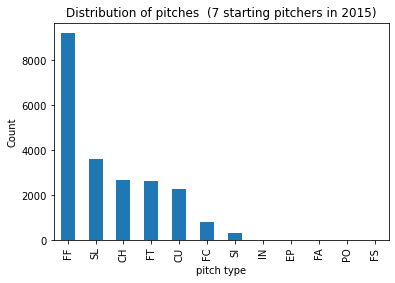

In [41]:
data15clean.pitch_type.value_counts().plot(kind='bar')
plt.xlabel('pitch type')
plt.ylabel('Count')
plt.title('Distribution of pitches  (7 starting pitchers in 2015)')
#plt.plot()

### The four seam fastball is by far the most common pitch thrown among the 7 pitchers we selected. 

One idea that could be implemented is grouping the pitches by fastball vs off speed pitches, so that there is are only 2 choices for pitch type. (From the hitters point of view, this is the most important information needed anyways). 

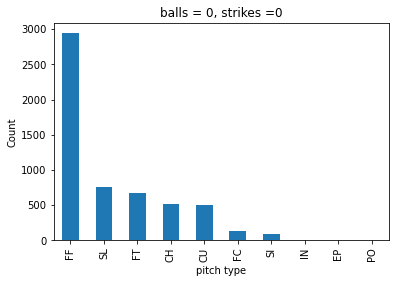

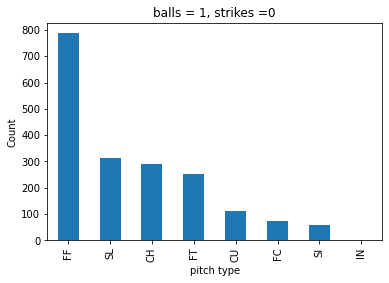

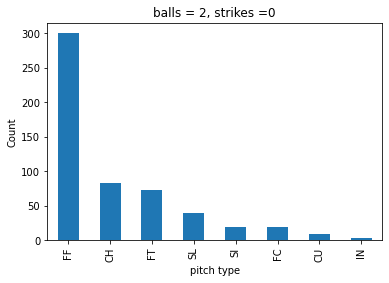

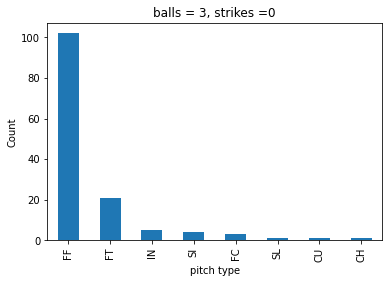

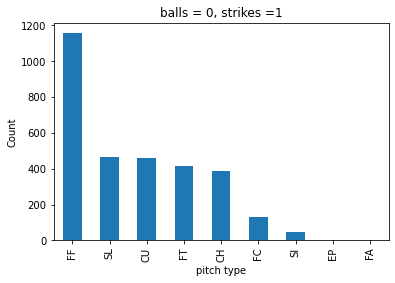

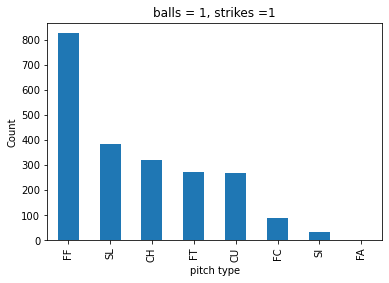

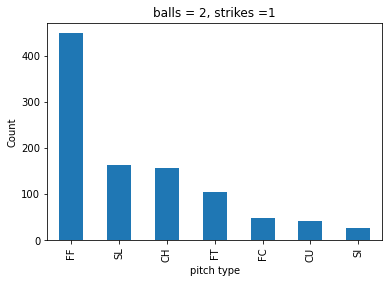

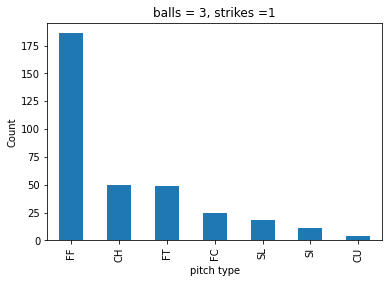

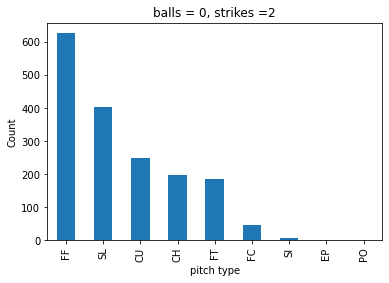

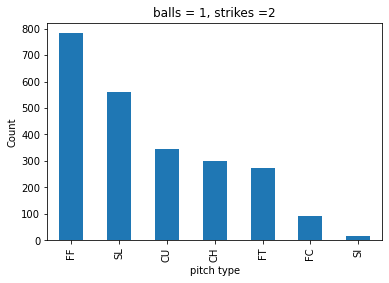

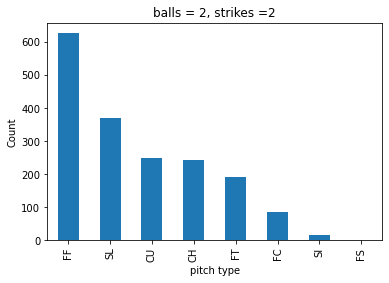

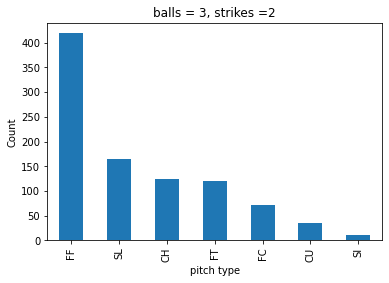

In [53]:
#plots that show the distribution of pitches depending on the balls and strikes 
for i in range(3):
    for j in range(4):
        plt.figure()
        data15clean[np.logical_and(data15clean.loc[:, 's_count'].astype(int) == i ,\
                                   data15clean.loc[:, 'b_count'].astype(int) == j)]\
        .pitch_type.value_counts().plot(kind = 'bar')
        plt.xlabel('pitch type')
        plt.ylabel('Frequency')
        plt.title('balls = ' +str(j)+', strikes =' +str(i))
        plt.show()

### These make sense heuristically:
One can see that in counts favoring the pitcher (0 balls 2 strikes, 1 ball 2 strikes etc), it is more common to see pitchers throw a more diverse selection of pitches (sliders, curveballs etc). With counts favoring the hitter (2+ balls, 0 strikes etc), pitchers throw the fastball more often to avoid walking batters (throwing 4 balls which puts the hitter on first base) as it is easier to control.

### Without doing any more filtering of the data, I'll wrap this notebook up by generating histograms to get a brief view of some of the other features present. 
Some of these (like ab_id, date etc) don't have any meaning in this context, this is just a broad overview kind of task. We will do more targeted plotting in the exploratory data analysis notebook. 

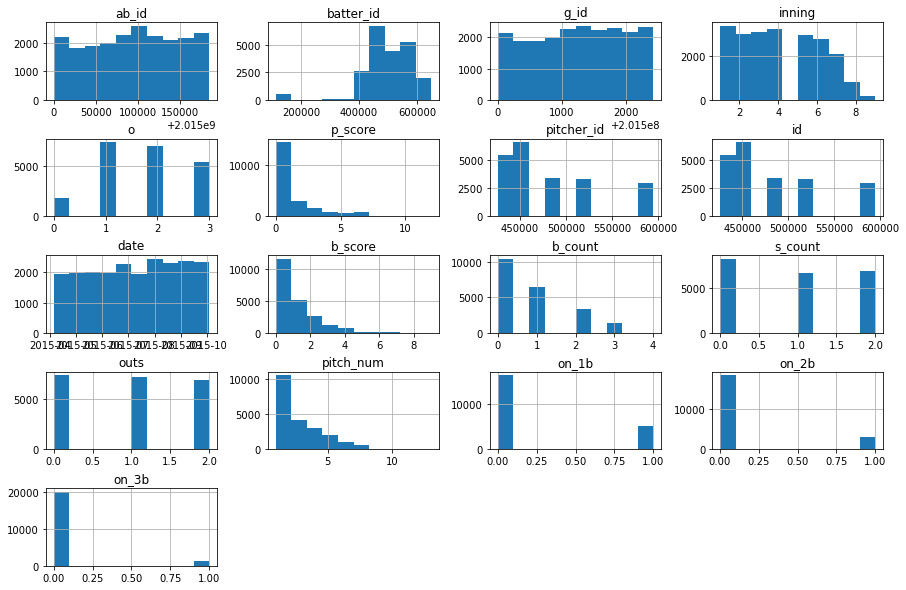

In [54]:

data15clean.hist(figsize = (15,10))
plt.subplots_adjust(hspace = 0.5);

In [48]:
datapath = '../data/processed'
save_file(data15clean, 'clean15.csv', datapath)

Writing file.  "../data/processed\clean15.csv"


### For now, this will be the primary csv file that will be used moving forward into the exploratory data analysis. 



## Notes to discuss during next mentor call. 

I was looking into ways of potentially grouping the data by 'ab_id' so that features such as 'event' only show up once for each at bat in the data. Right now, I can currently divide by the # of at bats to get a distribution that properly represents the relative frequencies of outcomes, so the data can be worked with as is. However I think maybe using multiindexing or something may give a more tidy presentation of the data. Because each row currently represents a single pitch, features that occur only on the last pitch of the at bat show up multiple times. For example, an at bat with 6 pitches will have 6 identical outcomes, such as a home run or strikeout, even though they really only occur once. I was considering melting the data so that each pitch would be represented in the columns, but considering that the pitches have 13 different features alone, this would create a very large number of new columns. (5625 x ~140) instead of (21602 x 24), with several columns with varying numbers of missing values (at bats with 3 pitches would have missing values in the columns created by at bats with 4,5,6+ pitches. 

For referencing, here are the key definitions from Kaggle where the raw csv's were obtained. 

#### Pitches
CH - Changeup

CU - Curveball

EP - Eephus*

FC - Cutter

FF - Four-seam Fastball

FO - Pitchout (also PO)*

FS - Splitter

FT - Two-seam Fastball

IN - Intentional ball

KC - Knuckle curve

KN - Knuckeball

PO - Pitchout (also FO)*

SC - Screwball*

SI - Sinker

SL - Slider

UN - Unknown*

these pitch types occur rarely

#### Code Definitions 

While these aren't spelled out anywhere, play descriptions allowed confident identification of these codes

B - Ball

*B - Ball in dirt

S - Swinging Strike

C - Called Strike

F - Foul

T - Foul Tip

L - Foul Bunt

I - Intentional Ball

W - Swinging Strike (Blocked)

M - Missed Bunt

P - Pitchout

Q - Swinging pitchout

R - Foul pitchout

Values that only occur on last pitch of at-bat:

X - In play, out(s)

D - In play, no out

E - In play, runs

H - Hit by pitch

Note: all codes, except for H, come directly from the XML files. All at-bats with code H were given no code in the XMLs.

# END OF 7.6 NOTEBOOK



## From mentor call, creating new column with sequence of data  
    df1 = data15clean.copy()

    df1['new_col'] = data15clean.groupby(columns =['eventID','col2'])['p_type'].agg(list).reset_index(drop = True)
    #list with floats
    # or .apply(list)
    #may get dimension error because its trying to push whole df into one column
    # can do agg first and then reset index. 
    unique_list = list(df1.new_col.unique())
    list_map = dict(zip(unique_list, list(range(len(unique_list)))))
    df1['codes'] = df1.new_column.map(list_map)